### Consumer complaint classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score

In [2]:
df = pd.read_csv("Consumer_Complaints.csv")

In [3]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer Complaint,Company Public Response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date Sent to Company,Company Response to Consumer,Timely response?,Consumer disputed?,Complaint ID
0,3/12/14,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,M&T BANK CORPORATION,MI,48382,NaN,NaN,Referral,3/17/14,Closed with explanation,Yes,No,759217
1,10/1/16,Credit reporting,NaN,Incorrect information on credit report,Account status,I have outdated information on my credit repor...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AL,352XX,NaN,Consent provided,Web,10/5/16,Closed with explanation,Yes,No,2141773
2,10/17/16,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,I purchased a new car on XXXX XXXX. The car de...,NaN,"CITIZENS FINANCIAL GROUP, INC.",PA,177XX,Older American,Consent provided,Web,10/20/16,Closed with explanation,Yes,No,2163100
3,6/8/14,Credit card,NaN,Bankruptcy,NaN,NaN,NaN,AMERICAN EXPRESS COMPANY,ID,83854,Older American,NaN,Web,6/10/14,Closed with explanation,Yes,Yes,885638
4,9/13/14,Debt collection,Credit card,Communication tactics,Frequent or repeated calls,NaN,NaN,"CITIBANK, N.A.",VA,23233,NaN,NaN,Web,9/13/14,Closed with explanation,Yes,Yes,1027760


In [4]:
df.shape

(9999, 18)

In [5]:
col = ['Product', 'Consumer Complaint']
df= df[col]

In [6]:
df= df[pd.notnull(df['Consumer Complaint'])]

In [7]:
df.columns=['Product', 'Consumer_complaint']

In [8]:
df['category_id'] = df['Product'].factorize()[0]

In [9]:
cat_id_df = df[["Product", "category_id"]].drop_duplicates().sort_values('category_id')

In [10]:
cat_to_id = dict(cat_id_df.values)

In [11]:
id_to_cat = dict(cat_id_df[['category_id','Product']].values)

In [12]:
df.head()

,Product,Consumer_complaint,category_id
1,Credit reporting,I have outdated information on my credit repor...,0
2,Consumer Loan,I purchased a new car on XXXX XXXX. The car de...,1
7,Credit reporting,An account on my credit report has a mistaken ...,0
12,Debt collection,This company refuses to provide me verificatio...,2
16,Debt collection,This complaint is in regards to Square Two Fin...,2


In [14]:
fig = plt.figure(figsize= (8,6))
plt.show()

<Figure size 576x432 with 0 Axes>

<AxesSubplot:xlabel='Product'>

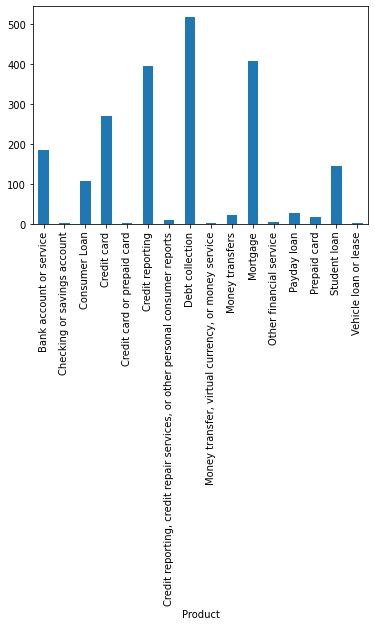

In [15]:
df.groupby('Product').Consumer_complaint.count().plot.bar(ylim=0)

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
tfidf = TfidfVectorizer(sublinear_tf= True, #use a logarithmic form for frequency
                       min_df = 5, #minimum numbers of documents a word must be present in to be kept
                       norm= 'l2', #ensure all our feature vectors have a euclidian norm of 1
                       ngram_range= (1,2), #to indicate that we want to consider both unigrams and bigrams.
                       stop_words ='english') #to remove all common pronouns to reduce the number of noisy features

In [20]:
features = tfidf.fit_transform(df.Consumer_complaint).toarray()

In [21]:
labels = df.category_id
features.shape

(2114, 6081)

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(df['Consumer_complaint'], df['Product'], random_state= 0)

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

In [25]:
count_vect = CountVectorizer()

In [26]:
from sklearn.feature_extraction.text import TfidfTransformer

In [27]:
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

### Model Building

In [28]:
from sklearn.svm import LinearSVC
clf = LinearSVC().fit(X_train_tfidf, y_train)

In [29]:
print(clf.predict(count_vect.transform(['I have outdated information on my credit repor'])))

['Credit reporting']


In [30]:
y_pred = clf.predict(count_vect.transform(X_test))

In [31]:
from sklearn import metrics

In [39]:
print(metrics.classification_report(y_test,y_pred))

                                                                              precision    recall  f1-score   support

                                                     Bank account or service       0.60      0.80      0.69        44
                                                               Consumer Loan       0.36      0.43      0.39        21
                                                                 Credit card       0.69      0.78      0.73        72
                                                            Credit reporting       0.70      0.87      0.77        91
Credit reporting, credit repair services, or other personal consumer reports       0.00      0.00      0.00         2
                                                             Debt collection       0.86      0.69      0.76       124
                                                             Money transfers       0.20      0.09      0.13        11
                                                       

c:\users\jastyn\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\jastyn\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\jastyn\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [40]:
from sklearn.pipeline import Pipeline

In [41]:
text_clf=Pipeline([('tf',TfidfVectorizer(sublinear_tf= True, 
                       min_df = 5, 
                       norm= 'l2', 
                       ngram_range= (1,2), 
                       stop_words ='english') ),
                 ('clf',LinearSVC())])

In [42]:
text_clf.fit(X_train, y_train)

Pipeline(steps=[('tf',
                 TfidfVectorizer(min_df=5, ngram_range=(1, 2),
                                 stop_words='english', sublinear_tf=True)),
                ('clf', LinearSVC())])

In [43]:
text_clf.predict(['I have outdated information on my credit repor'])[0]

'Credit reporting'

In [44]:
cv_results = cross_val_score(text_clf, 
                                 X_train, y_train, 
                                 cv=5,
                                 scoring="accuracy",
                                 n_jobs=-1)
print(np.mean(cv_results))

c:\users\jastyn\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


0.7936908517350157


In [45]:
from sklearn.naive_bayes import BernoulliNB

In [46]:
mb=BernoulliNB()

In [47]:
text_clf=Pipeline([('tf',TfidfVectorizer(sublinear_tf= True, 
                       min_df = 5, 
                       norm= 'l2', 
                       ngram_range= (1,2), 
                       stop_words ='english') ),
                 ('clf',BernoulliNB())])

In [48]:
text_clf.fit(X_train, y_train)

Pipeline(steps=[('tf',
                 TfidfVectorizer(min_df=5, ngram_range=(1, 2),
                                 stop_words='english', sublinear_tf=True)),
                ('clf', BernoulliNB())])

In [49]:
text_clf.predict(['I have outdated information on my credit repor'])[0]

'Credit reporting'

In [50]:
y_pred=text_clf.predict(X_test)

In [51]:
print(metrics.classification_report(y_test,y_pred))

                                                                              precision    recall  f1-score   support

                                                     Bank account or service       0.71      0.55      0.62        44
                                                               Consumer Loan       0.50      0.14      0.22        21
                                                                 Credit card       0.69      0.60      0.64        72
                                                            Credit reporting       0.60      0.92      0.73        91
Credit reporting, credit repair services, or other personal consumer reports       0.00      0.00      0.00         2
                                                             Debt collection       0.63      0.84      0.72       124
                                                             Money transfers       0.00      0.00      0.00        11
                                                       

c:\users\jastyn\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\jastyn\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\jastyn\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [52]:
cv_results = cross_val_score(text_clf, 
                                 X_train, y_train, 
                                 cv=5,
                                 scoring="accuracy",
                                 n_jobs=-1)
print(np.mean(cv_results))

c:\users\jastyn\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


0.6580441640378549


In [53]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
text_clf=Pipeline([('tf',TfidfVectorizer(sublinear_tf= True, 
                       min_df = 5, 
                       norm= 'l2', 
                       ngram_range= (1,2), 
                       stop_words ='english') ),
                 ('clf',DecisionTreeClassifier())])

In [55]:
text_clf.fit(X_train, y_train)

Pipeline(steps=[('tf',
                 TfidfVectorizer(min_df=5, ngram_range=(1, 2),
                                 stop_words='english', sublinear_tf=True)),
                ('clf', DecisionTreeClassifier())])

In [56]:
text_clf.predict(['I have outdated information on my credit repor'])[0]

'Debt collection'

In [57]:
y_pred=text_clf.predict(X_test)

In [58]:
print(metrics.classification_report(y_test,y_pred))

                                                                              precision    recall  f1-score   support

                                                     Bank account or service       0.36      0.55      0.43        44
                                                               Consumer Loan       0.35      0.29      0.32        21
                                                                 Credit card       0.69      0.69      0.69        72
                                                            Credit reporting       0.72      0.74      0.73        91
Credit reporting, credit repair services, or other personal consumer reports       0.00      0.00      0.00         2
                                                             Debt collection       0.71      0.69      0.70       124
                                                             Money transfers       0.00      0.00      0.00        11
                                                       

c:\users\jastyn\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\jastyn\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\jastyn\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [59]:
cv_results = cross_val_score(text_clf, 
                                 X_train, y_train, 
                                 cv=5,
                                 scoring="accuracy",
                                 n_jobs=-1)
print(np.mean(cv_results))

c:\users\jastyn\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


0.6145110410094637


In [60]:
!pip install catboost


ERROR: Exception:
Traceback (most recent call last):
  File "c:\users\jastyn\appdata\local\programs\python\python39\lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "c:\users\jastyn\appdata\local\programs\python\python39\lib\site-packages\pip\_vendor\urllib3\response.py", line 519, in read
    data = self._fp.read(amt) if not fp_closed else b""
  File "c:\users\jastyn\appdata\local\programs\python\python39\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 62, in read
    data = self.__fp.read(amt)


  File "c:\users\jastyn\appdata\local\programs\python\python39\lib\http\client.py", line 459, in read
    n = self.readinto(b)
  File "c:\users\jastyn\appdata\local\programs\python\python39\lib\http\client.py", line 503, in readinto
    n = self.fp.readinto(b)
  File "c:\users\jastyn\appdata\local\programs\python\python39\lib\socket.py", line 704, in readinto
    return self._sock.recv_into(b)
  File "c:\users\jastyn\appdata\local\programs\python\python39\lib\ssl.py", line 1241, in recv_into
    return self.read(nbytes, buffer)
  File "c:\users\jastyn\appdata\local\programs\python\python39\lib\ssl.py", line 1099, in read
    return self._sslobj.read(len, buffer)
socket.timeout: The read operation timed out

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\jastyn\appdata\local\programs\python\python39\lib\site-packages\pip\_internal\cli\base_command.py", line 173, in _main
    status = self.run(options, args)
  File

In [62]:
from catboost import CatBoostClassifier

In [63]:
text_clf=Pipeline([('tf',TfidfVectorizer(sublinear_tf= True, 
                       min_df = 5, 
                       norm= 'l2', 
                       ngram_range= (1,2), 
                       stop_words ='english') ),
                 ('clf',CatBoostClassifier())])

In [66]:
text_clf.fit(X_train, y_train)

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

Learning rate set to 0.081007
0:	learn: 2.4854640	total: 3.23s	remaining: 53m 42s
1:	learn: 2.2831591	total: 6.65s	remaining: 55m 18s
2:	learn: 2.1564614	total: 10.6s	remaining: 58m 54s
3:	learn: 2.0605129	total: 14.3s	remaining: 59m 21s
4:	learn: 1.9462300	total: 17.9s	remaining: 59m 19s
5:	learn: 1.8610484	total: 21.6s	remaining: 59m 37s
6:	learn: 1.7890315	total: 25.1s	remaining: 59m 15s
7:	learn: 1.7248507	total: 29.2s	remaining: 1h 17s
8:	learn: 1.6704831	total: 33.4s	remaining: 1h 1m 19s
9:	learn: 1.6290230	total: 37.7s	remaining: 1h 2m 16s
10:	learn: 1.5851092	total: 42s	remaining: 1h 2m 56s
11:	learn: 1.5387648	total: 46.3s	remaining: 1h 3m 34s
12:	learn: 1.5082813	total: 50.5s	remaining: 1h 3m 54s
13:	learn: 1.4703662	total: 54.2s	remaining: 1h 3m 40s
14:	learn: 1.4445402	total: 58.3s	remaining: 1h 3m 45s
15:	learn: 1.4213383	total: 1m 2s	remaining: 1h 3m 47s
16:	learn: 1.3953513	total: 1m 6s	remaining: 1h 3m 53s
17:	learn: 1.3735164	total: 1m 10s	remaining: 1h 3m 57s
18:	lear

148:	learn: 0.7585279	total: 11m 44s	remaining: 1h 7m 4s
149:	learn: 0.7570061	total: 11m 51s	remaining: 1h 7m 9s
150:	learn: 0.7564146	total: 11m 58s	remaining: 1h 7m 20s
151:	learn: 0.7544475	total: 12m 4s	remaining: 1h 7m 24s
152:	learn: 0.7537299	total: 12m 11s	remaining: 1h 7m 31s
153:	learn: 0.7530293	total: 12m 20s	remaining: 1h 7m 49s
154:	learn: 0.7525985	total: 12m 28s	remaining: 1h 8m
155:	learn: 0.7510070	total: 12m 35s	remaining: 1h 8m 6s
156:	learn: 0.7498981	total: 12m 44s	remaining: 1h 8m 23s
157:	learn: 0.7489539	total: 12m 52s	remaining: 1h 8m 36s
158:	learn: 0.7481149	total: 13m	remaining: 1h 8m 48s
159:	learn: 0.7451465	total: 13m 9s	remaining: 1h 9m 5s
160:	learn: 0.7444409	total: 13m 15s	remaining: 1h 9m 5s
161:	learn: 0.7428568	total: 13m 21s	remaining: 1h 9m 4s
162:	learn: 0.7417085	total: 13m 27s	remaining: 1h 9m 6s
163:	learn: 0.7412448	total: 13m 33s	remaining: 1h 9m 8s
164:	learn: 0.7378078	total: 13m 40s	remaining: 1h 9m 10s
165:	learn: 0.7374767	total: 13m

291:	learn: 0.6328156	total: 26m 7s	remaining: 1h 3m 19s
292:	learn: 0.6323283	total: 26m 11s	remaining: 1h 3m 13s
293:	learn: 0.6311011	total: 26m 17s	remaining: 1h 3m 7s
294:	learn: 0.6308539	total: 26m 21s	remaining: 1h 3m
295:	learn: 0.6304980	total: 26m 26s	remaining: 1h 2m 53s
296:	learn: 0.6301578	total: 26m 31s	remaining: 1h 2m 47s
297:	learn: 0.6297255	total: 26m 37s	remaining: 1h 2m 42s
298:	learn: 0.6293409	total: 26m 42s	remaining: 1h 2m 37s
299:	learn: 0.6283704	total: 26m 47s	remaining: 1h 2m 31s
300:	learn: 0.6276440	total: 26m 54s	remaining: 1h 2m 29s
301:	learn: 0.6274650	total: 27m 1s	remaining: 1h 2m 26s
302:	learn: 0.6272038	total: 27m 8s	remaining: 1h 2m 26s
303:	learn: 0.6268656	total: 27m 14s	remaining: 1h 2m 21s
304:	learn: 0.6256321	total: 27m 19s	remaining: 1h 2m 15s
305:	learn: 0.6233371	total: 27m 24s	remaining: 1h 2m 10s
306:	learn: 0.6230659	total: 27m 30s	remaining: 1h 2m 4s
307:	learn: 0.6228915	total: 27m 36s	remaining: 1h 2m
308:	learn: 0.6224458	total

438:	learn: 0.5622322	total: 38m 14s	remaining: 48m 52s
439:	learn: 0.5618922	total: 38m 18s	remaining: 48m 45s
440:	learn: 0.5611140	total: 38m 23s	remaining: 48m 39s
441:	learn: 0.5606189	total: 38m 27s	remaining: 48m 32s
442:	learn: 0.5602658	total: 38m 31s	remaining: 48m 26s
443:	learn: 0.5601075	total: 38m 35s	remaining: 48m 19s
444:	learn: 0.5594147	total: 38m 40s	remaining: 48m 14s
445:	learn: 0.5590874	total: 38m 45s	remaining: 48m 8s
446:	learn: 0.5588065	total: 38m 49s	remaining: 48m 1s
447:	learn: 0.5585164	total: 38m 54s	remaining: 47m 55s
448:	learn: 0.5579157	total: 38m 58s	remaining: 47m 49s
449:	learn: 0.5571088	total: 39m 2s	remaining: 47m 43s
450:	learn: 0.5569211	total: 39m 7s	remaining: 47m 37s
451:	learn: 0.5566292	total: 39m 11s	remaining: 47m 30s
452:	learn: 0.5563869	total: 39m 15s	remaining: 47m 24s
453:	learn: 0.5561557	total: 39m 20s	remaining: 47m 18s
454:	learn: 0.5559439	total: 39m 24s	remaining: 47m 12s
455:	learn: 0.5557093	total: 39m 28s	remaining: 47m 

586:	learn: 0.5031902	total: 49m 33s	remaining: 34m 52s
587:	learn: 0.5028251	total: 49m 37s	remaining: 34m 46s
588:	learn: 0.5024755	total: 49m 42s	remaining: 34m 40s
589:	learn: 0.5022748	total: 49m 46s	remaining: 34m 35s
590:	learn: 0.5020494	total: 49m 50s	remaining: 34m 29s
591:	learn: 0.5017964	total: 49m 55s	remaining: 34m 24s
592:	learn: 0.5008619	total: 50m	remaining: 34m 19s
593:	learn: 0.5000550	total: 50m 5s	remaining: 34m 13s
594:	learn: 0.4998996	total: 50m 9s	remaining: 34m 8s
595:	learn: 0.4997111	total: 50m 13s	remaining: 34m 2s
596:	learn: 0.4995804	total: 50m 18s	remaining: 33m 57s
597:	learn: 0.4994023	total: 50m 22s	remaining: 33m 52s
598:	learn: 0.4992132	total: 50m 27s	remaining: 33m 46s
599:	learn: 0.4990593	total: 50m 31s	remaining: 33m 41s
600:	learn: 0.4988352	total: 50m 36s	remaining: 33m 35s
601:	learn: 0.4984057	total: 50m 40s	remaining: 33m 30s
602:	learn: 0.4982313	total: 50m 44s	remaining: 33m 24s
603:	learn: 0.4980112	total: 50m 49s	remaining: 33m 19s


734:	learn: 0.4611544	total: 1h 1m 36s	remaining: 22m 12s
735:	learn: 0.4609692	total: 1h 1m 42s	remaining: 22m 7s
736:	learn: 0.4607782	total: 1h 1m 49s	remaining: 22m 3s
737:	learn: 0.4604067	total: 1h 1m 55s	remaining: 21m 59s
738:	learn: 0.4600528	total: 1h 2m 2s	remaining: 21m 54s
739:	learn: 0.4598494	total: 1h 2m 8s	remaining: 21m 50s
740:	learn: 0.4596753	total: 1h 2m 14s	remaining: 21m 45s
741:	learn: 0.4593226	total: 1h 2m 19s	remaining: 21m 40s
742:	learn: 0.4591645	total: 1h 2m 26s	remaining: 21m 35s
743:	learn: 0.4589777	total: 1h 2m 31s	remaining: 21m 30s
744:	learn: 0.4588349	total: 1h 2m 36s	remaining: 21m 25s
745:	learn: 0.4584952	total: 1h 2m 42s	remaining: 21m 21s
746:	learn: 0.4583064	total: 1h 2m 47s	remaining: 21m 16s
747:	learn: 0.4578395	total: 1h 2m 53s	remaining: 21m 11s
748:	learn: 0.4577034	total: 1h 2m 59s	remaining: 21m 6s
749:	learn: 0.4574683	total: 1h 3m 4s	remaining: 21m 1s
750:	learn: 0.4572802	total: 1h 3m 10s	remaining: 20m 56s
751:	learn: 0.4568015

876:	learn: 0.4263896	total: 1h 12m 32s	remaining: 10m 10s
877:	learn: 0.4260844	total: 1h 12m 37s	remaining: 10m 5s
878:	learn: 0.4259984	total: 1h 12m 41s	remaining: 10m
879:	learn: 0.4258520	total: 1h 12m 45s	remaining: 9m 55s
880:	learn: 0.4256608	total: 1h 12m 50s	remaining: 9m 50s
881:	learn: 0.4254921	total: 1h 12m 55s	remaining: 9m 45s
882:	learn: 0.4252535	total: 1h 12m 59s	remaining: 9m 40s
883:	learn: 0.4250883	total: 1h 13m 4s	remaining: 9m 35s
884:	learn: 0.4248553	total: 1h 13m 8s	remaining: 9m 30s
885:	learn: 0.4247514	total: 1h 13m 12s	remaining: 9m 25s
886:	learn: 0.4245965	total: 1h 13m 17s	remaining: 9m 20s
887:	learn: 0.4244641	total: 1h 13m 21s	remaining: 9m 15s
888:	learn: 0.4243157	total: 1h 13m 26s	remaining: 9m 10s
889:	learn: 0.4241853	total: 1h 13m 30s	remaining: 9m 5s
890:	learn: 0.4240213	total: 1h 13m 34s	remaining: 9m
891:	learn: 0.4236957	total: 1h 13m 39s	remaining: 8m 55s
892:	learn: 0.4234701	total: 1h 13m 43s	remaining: 8m 50s
893:	learn: 0.4233542	t

Pipeline(steps=[('tf',
                 TfidfVectorizer(min_df=5, ngram_range=(1, 2),
                                 stop_words='english', sublinear_tf=True)),
                ('clf',
                 <catboost.core.CatBoostClassifier object at 0x000001F9A34B4490>)])

In [67]:
ptext_clf.predict(['I have outdated information on my credit repor'])[0]

NameError: name 'ptext_clf' is not defined

In [ ]:
y_pred=text_clf.predict(X_test)

In [ ]:
y_pred

In [ ]:
print(metrics.classification_report(y_test,y_pred))

In [ ]:
cv_results = cross_val_score(text_clf, 
                                 X_train, y_train, 
                                 cv=5,
                                 scoring="accuracy",
                                 n_jobs=-1)
print(np.mean(cv_results))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf=RandomForestClassifier()

In [ ]:
text_clf=Pipeline([('tf',TfidfVectorizer(sublinear_tf= True, 
                       min_df = 5, 
                       norm= 'l2', 
                       ngram_range= (1,2), 
                       stop_words ='english') ),
                 ('clf',RandomForestClassifier())])

In [ ]:
text_clf.fit(X_train, y_train)

In [ ]:
text_clf.predict(['I have outdated information on my credit repor'])[0]

In [ ]:
y_pred=text_clf.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test,y_pred))

In [ ]:
cv_results = cross_val_score(text_clf, 
                                 X_train, y_train, 
                                 cv=5,
                                 scoring="accuracy",
                                 n_jobs=-1)

In [ ]:
print(np.mean(cv_results))

In [ ]:
from xgboost import XGBClassifier

In [ ]:
text_clf=Pipeline([('tf',TfidfVectorizer(sublinear_tf= True, 
                       min_df = 5, 
                       norm= 'l2', 
                       ngram_range= (1,2), 
                       stop_words ='english') ),
                 ('clf',XGBClassifier())])

In [ ]:
text_clf.fit(X_train, y_train)

In [ ]:
y_pred=text_clf.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test,y_pred))

In [ ]:
cv_results = cross_val_score(text_clf, 
                                 X_train, y_train, 
                                 cv=5,
                                 scoring="accuracy",
                                 n_jobs=-1)

In [ ]:
print(np.mean(cv_results))

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
text_clf=Pipeline([('tf',TfidfVectorizer(sublinear_tf= True, 
                       min_df = 5, 
                       norm= 'l2', 
                       ngram_range= (1,2), 
                       stop_words ='english') ),
                 ('clf',LGBMClassifier())])

In [ ]:
text_clf.fit(X_train, y_train)

In [ ]:
y_pred=text_clf.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test,y_pred))

In [ ]:
cv_results = cross_val_score(text_clf, 
                                 X_train, y_train, 
                                 cv=5,
                                 scoring="accuracy",
                                 n_jobs=-1)

In [ ]:
print(np.mean(cv_results))

### Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [ ]:
 #Randomized Search CV
 import numpy as np
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [ ]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [ ]:
# Use the random grid to search for best hyperparameters
rf=RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='accuracy', n_iter = 10, cv = 5,n_jobs=-1)

In [ ]:
rf.fit(X_train_tfidf, y_train)

In [ ]:
rf.best_params_

In [ ]:
rf.best_score_

In [ ]:
from scipy.stats import uniform, randint

In [ ]:
xgb=XGBClassifier()

In [ ]:
params = {
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}

In [ ]:
xgb = RandomizedSearchCV(estimator = xgb, param_distributions = params,scoring='accuracy', n_iter = 10, cv = 5, n_jobs = -1)

In [ ]:
xgb.fit(X_train_tfidf, y_train)

In [ ]:
xgb.best_params_

In [ ]:
xgb.best_score_

### Stacking Classifier

In [ ]:
from sklearn.ensemble import StackingClassifier
estimators = [('rf', rf), ('mb', mb),('ab',XGBClassifier())]

clf = StackingClassifier(estimators=estimators)

In [ ]:
clf.fit(X_train_tfidf, y_train)

In [ ]:
cv_results = cross_val_score(clf, 
                                 X_train_tfidf, y_train, 
                                 cv=5,
                                 scoring="accuracy",
                                 n_jobs=-1)
print(np.mean(cv_results))